In [6]:
import matplotlib.pyplot as plt
import numpy as np
import wave
from playsound import playsound

In [7]:
#prev functions

def plot_signal(x,signal):
    plt.xlabel("n")
    plt.ylabel("x[n]")
    plt.stem(x, signal, use_line_collection = True) 
    plt.show()

#Analysys equation
def DTFT(signal,n,w):
    y = []
    #Appending the summations for all omegas(w)
    for i in range(len(w)):

        #Summation for analysis equation for a particular omega(w[i])
        sum = 0
        for j in range(len(signal)):
              sum += signal[j]*complex(np.cos(w[i]*n[j]),-np.sin(w[i]*n[j]))
        y.append(np.round(sum,decimals = 4))
    return y

def plot_spectrums(y,w):
    mag = []
    phase = []
    for i in range(len(w)):
        mag.append(abs(y[i]))
        p = np.angle(y[i])
        phase.append(p)
  #Plotting the spectrums
    plt.subplot(2,1,1)
    plt.title("Magnitude spectrum")
    plt.xlabel("ω")
    plt.ylabel("magnitude")
    plt.plot(w,mag)
    plt.show()
    plt.subplot(2,1,2)
    plt.title("Phase spectrum")
    plt.xlabel("ω")
    plt.ylabel("phase")
    plt.plot(w,phase)
    plt.show()

Enter the sample (alarm/armageddon/cry/wow) : cry
The 1st audio file is the signal with frame rate = 2fs,We can see that the audio is sped up by a factor of 2 (duration of the signal is decreased by 2 times)


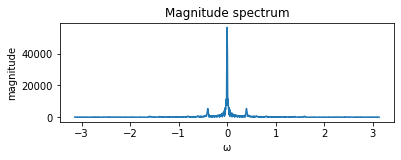

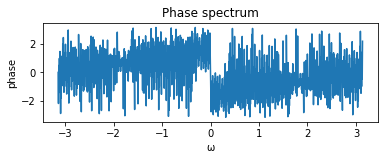

The 2nd audio file is the signal with frame rate same as original sampling frequency fs


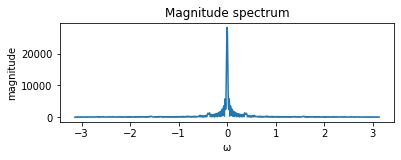

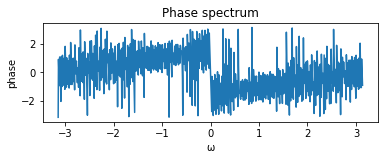

The 3rd audio file is the signal with frame rate = 0.5fs, We can see that the audio is slowed down by a factor of 2 (duration of the signal is increased by two times)


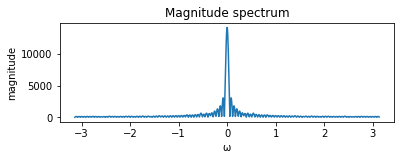

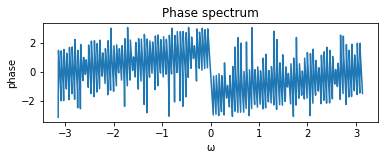

The 4th audio file is the signal with frame rate = 0.25fs,We can see that the audio is slowed down by a factor of 4 (duration of the signal is increased by 4 times)


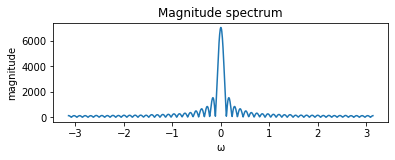

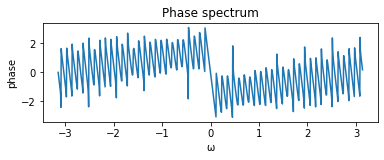

As we decrease the frame rate, the magnitude spectrum becomes less accurate since the number of frames we give is decreasing
We can also see that width of the magnitude spectrum of DTFT  plot increases with decrease in frame rate
For framerate = 2fs the magnitude spectrum looks like a sharp impulse and for framerate = 0.25fs the magnitude spectrum looks like a smooth sinc function


In [8]:
#Number of values of w
N = 1000
#omega in the range -π ≤ ω < π
w = np.linspace(-np.pi,np.pi,N,endpoint = False)

#Takes the file name ass string and calculates dtft and plots the spectrums
def dtftAndPlot(sr):
    s = wave.open(sr, 'rb')
    nf = s.getnframes()
    fs = s.getframerate()
    wow_signal = s.readframes(nf)
    duration = float(nf) / float(fs)
    s.close()
    signal = []
    #For nf frames it takes nf/fs sec
    #So, for 20ms=0.02sec it has fs*0.02 frames
    for i in range(int(fs*0.02)):
        signal.append(wow_signal[i])
    dtft = []
    n = np.linspace(0,int(fs*0.02)-1,int(fs*0.02))
    dtft = DTFT(signal,n,w)
    plot_spectrums(dtft,w)

#creates a new .wav file with given paramaeters
def create_wave(sr,nfs,signal_frames):
    wf = wave.open(sr, 'wb')
    wf.setnchannels(1)
    wf.setsampwidth(1)
    wf.setframerate(nfs)
    wf.writeframes(signal_frames)
    wf.close()
    playsound(sr)

#Changes the the framerate for the given filename and plots the spectums
def change_fs(s):
    sig  = wave.open(s+'.wav', 'rb')                  
    fs = sig.getframerate()
    nf = sig.getnframes()
    signal_frames = sig.readframes(nf)
    sig.close()
    print("The 1st audio file is the signal with frame rate = 2fs,We can see that the audio is sped up by a factor of 2 (duration of the signal is decreased by 2 times)")
    create_wave(s+'1.wav',2*fs,signal_frames)
    dtftAndPlot(s+'1.wav')
    print("The 2nd audio file is the signal with frame rate same as original sampling frequency fs")
    create_wave(s+'2.wav',fs,signal_frames)
    dtftAndPlot(s+'2.wav')
    print("The 3rd audio file is the signal with frame rate = 0.5fs, We can see that the audio is slowed down by a factor of 2 (duration of the signal is increased by two times)")
    create_wave(s+'3.wav',int(fs/2),signal_frames)
    dtftAndPlot(s+'3.wav')
    print("The 4th audio file is the signal with frame rate = 0.25fs,We can see that the audio is slowed down by a factor of 4 (duration of the signal is increased by 4 times)")
    create_wave(s+'4.wav',int(fs/4),signal_frames)
    dtftAndPlot(s+'4.wav')

s = input("Enter the sample (alarm/armageddon/cry/wow) : ")
change_fs(s)

print("As we decrease the frame rate, the magnitude spectrum becomes less accurate since the number of frames we give is decreasing")
print("We can also see that width of the magnitude spectrum of DTFT  plot increases with decrease in frame rate")
print("For framerate = 2fs the magnitude spectrum looks like a sharp impulse and for framerate = 0.25fs the magnitude spectrum looks like a smooth sinc function")



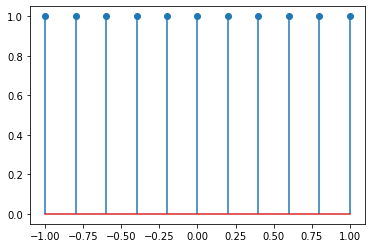

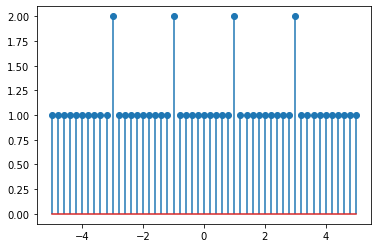

If a bandlimited signal with non zero endpoint value is taken, when we overlap the shifted signals in frequency domain at equality condition of Nyquist criteria then they overlap at the endpoints causing. 
Here we consider a rectangular signal from -1 t0 1 with amplitude = 1 and when we overlap the shifted spectrums, we can see that at the endpoints -3,-1,1,3 we are getting a different value i.e equal to 2. Hence we can see aliasing of the signal 


In [9]:
#1(c)

x1 = np.linspace(-1,1,11)  #x-axis for frequency domian representation of the signal(band limit)

ones = [1]*len(x1)
zeroes = [0]*(len(x1)-1)

y1 = zeroes+zeroes+ones+zeroes+zeroes  #initial signal
y2 = zeroes+ones+zeroes+zeroes+zeroes  #shifted left by 2
y3 = zeroes+zeroes+zeroes+ones+zeroes  #shifted right by 2
y4 = zeroes+zeroes+zeroes+zeroes+ones  #shifted left by 4
y5 = ones+zeroes+zeroes+zeroes+zeroes  #shifted right by 4

output = []
for i in range(0,len(y1)):
    output.append(y1[i]+y2[i]+y3[i]+y4[i]+y5[i])  #adding all the spectrums
    
x2 = np.linspace(-5,5,5*len(x1)-4) #x-axis for final output

plt.stem(x1,ones)
plt.show()
plt.stem(x2,output)
plt.show()

print("If a bandlimited signal with non zero endpoint value is taken, when we overlap the shifted signals in frequency domain at equality condition of Nyquist criteria then they overlap at the endpoints causing. ")
print("Here we consider a rectangular signal from -1 t0 1 with amplitude = 1 and when we overlap the shifted spectrums, we can see that at the endpoints -3,-1,1,3 we are getting a different value i.e equal to 2. Hence we can see aliasing of the signal ")

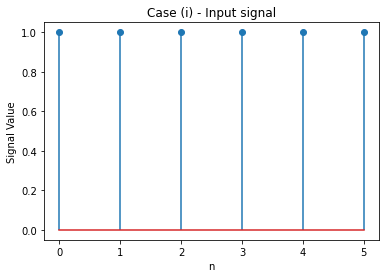

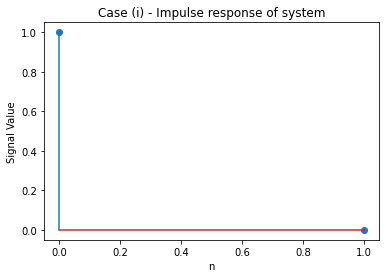

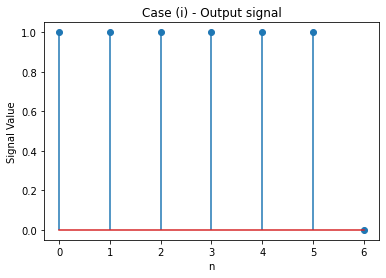

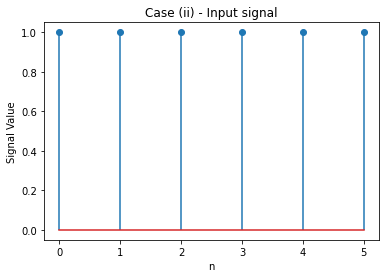

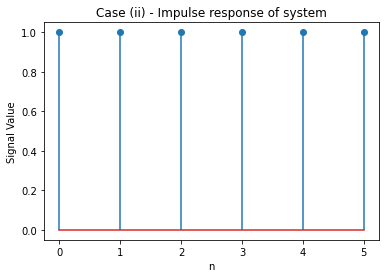

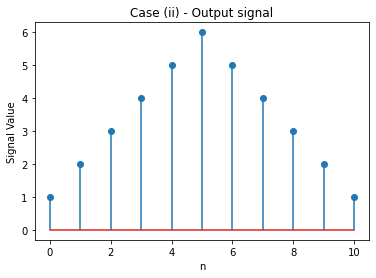

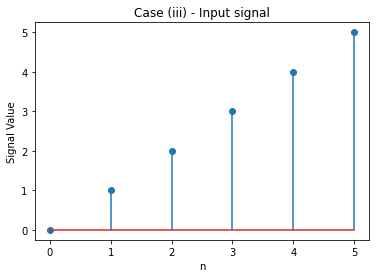

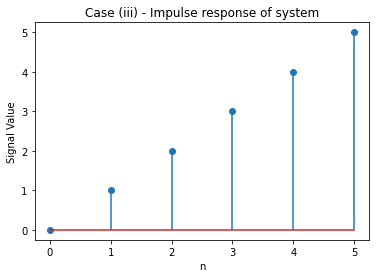

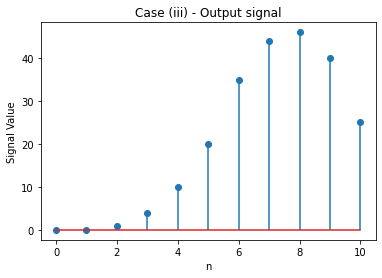

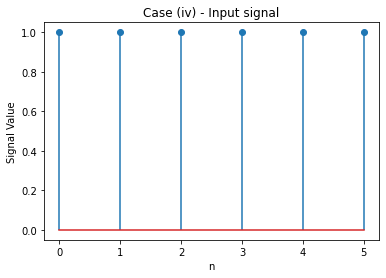

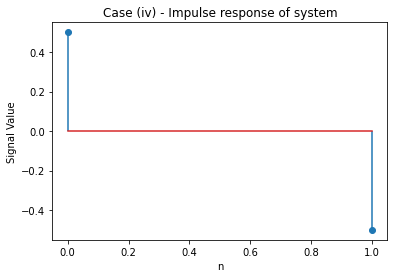

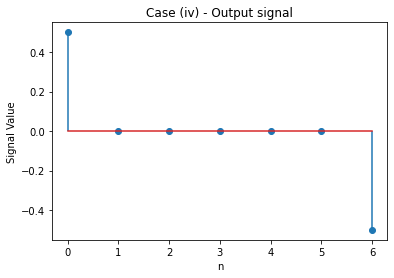

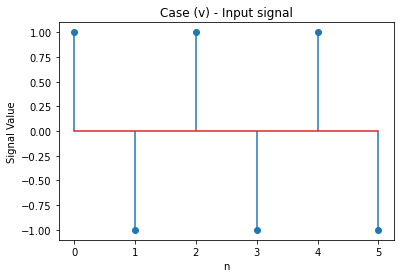

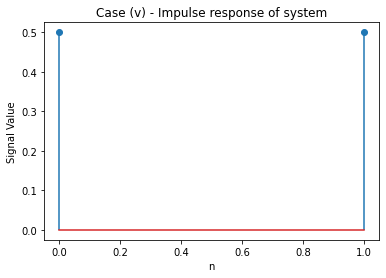

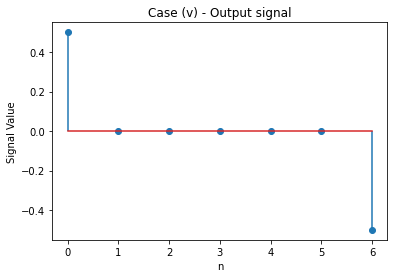

In [10]:

#Convolution function accepts input signal and impulse response as the parameters
def Convolution(x,h):
    k = len(x)                                         #variable k stores length of input signal
    l = len(h)                                         #variable l stores length of impulse response
    p = k+l
    Y = np.zeros(p-1)                                  #length of output signal of convolution is k+l-1
    for i in range(0,p-1):                             #Filling in all the array values of output signal
        for j in range(0,k):                           #iteration over length of impulse response signal
            if i-j < l and i-j >= 0  :                 #impulse response is defined only for index greater than or equal to 0 and less than signal length
                Y[i]=Y[i]+x[j]*h[i-j]                  #Convolution sum
    return Y                                           #returns output signal i.e convolution of x and h 

k = 6                                                  #defining length of input signals (can be changed by user, for our cases k>=6)
l = 2                                                  #defining length of impulse response signal (can be changed by user, for our cases l>=2)

#Case (i),(ii),(iv) input signal
x1 = np.zeros(k)
for i in range(0,k):
    x1[i] = 1

#Case (iii) input signal
x3 = np.zeros(k)
for i in range(0,k):
    x3[i] = i

#Case (v) input signal
x5 = np.zeros(k)
for i in range(0,k):
    x5[i] = np.cos(i*np.pi)

#Case (i) h[n] signal
delta = np.zeros(l)
for i in range(0,l):
    if i!=0:     
        delta[i] = 0  
    else:
        delta[i] = 1

#Case (iv) h[n] signal
conv4 = np.zeros(l)
for i in range(0,l):
    if i!=0:
        conv4[i] = 0.5*delta[i] - 0.5*delta[i-1]
    else:
        conv4[i] = 0.5*delta[i]

#Case (iv) h[n] signal
conv5 = np.zeros(l)
for i in range(0,l):
    if i!=0:
        conv5[i] = 0.5*delta[i] + 0.5*delta[i-1]
    else:
        conv5[i] = 0.5*delta[i]

output1 = Convolution(x1,delta)
output2 = Convolution(x1,x1)
output3 = Convolution(x3,x3)
output4 = Convolution(x1,conv4)
output5 = Convolution(x5,conv5)


plt.title("Case (i) - Input signal")                                
plt.xlabel("n")  
plt.ylabel("Signal Value")  
plt.stem(x1, use_line_collection = True)
plt.show()

plt.title("Case (i) - Impulse response of system")                                
plt.xlabel("n")  
plt.ylabel("Signal Value")  
plt.stem(delta, use_line_collection = True)
plt.show()

plt.title("Case (i) - Output signal")                                
plt.xlabel("n")  
plt.ylabel("Signal Value")  
plt.stem(output1, use_line_collection = True)
plt.show()


plt.title("Case (ii) - Input signal")                               
plt.xlabel("n")  
plt.ylabel("Signal Value")  
plt.stem(x1, use_line_collection = True)
plt.show()

plt.title("Case (ii) - Impulse response of system")                               
plt.xlabel("n")  
plt.ylabel("Signal Value")  
plt.stem(x1, use_line_collection = True)
plt.show()

plt.title("Case (ii) - Output signal")                                
plt.xlabel("n")  
plt.ylabel("Signal Value")  
plt.stem(output2, use_line_collection = True)
plt.show()


plt.title("Case (iii) - Input signal")                                
plt.xlabel("n")  
plt.ylabel("Signal Value")  
plt.stem(x3, use_line_collection = True)
plt.show()

plt.title("Case (iii) - Impulse response of system")                                
plt.xlabel("n")  
plt.ylabel("Signal Value")  
plt.stem(x3, use_line_collection = True)
plt.show()

plt.title("Case (iii) - Output signal")                                
plt.xlabel("n")  
plt.ylabel("Signal Value")  
plt.stem(output3, use_line_collection = True)
plt.show()


plt.title("Case (iv) - Input signal")                                
plt.xlabel("n")  
plt.ylabel("Signal Value")  
plt.stem(x1, use_line_collection = True)
plt.show()

plt.title("Case (iv) - Impulse response of system")                                
plt.xlabel("n")  
plt.ylabel("Signal Value")  
plt.stem(conv4, use_line_collection = True)
plt.show()

plt.title("Case (iv) - Output signal")                                
plt.xlabel("n")  
plt.ylabel("Signal Value")  
plt.stem(output4, use_line_collection = True)
plt.show()


plt.title("Case (v) - Input signal")                                
plt.xlabel("n")  
plt.ylabel("Signal Value")  
plt.stem(x5, use_line_collection = True)
plt.show()

plt.title("Case (v) - Impulse response of system")                                
plt.xlabel("n")  
plt.ylabel("Signal Value")  
plt.stem(conv5, use_line_collection = True)
plt.show()

plt.title("Case (v) - Output signal")                                
plt.xlabel("n")  
plt.ylabel("Signal Value")  
plt.stem(output5, use_line_collection = True)
plt.show()







Enter the sample (alarm/armageddon/cry/wow) : alarm


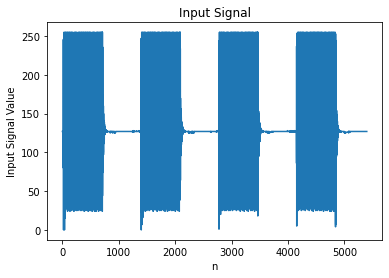

OBSERVATION : We can observe that amplitude of signal decreases when compared to the original signal, becase we shift and only the signal at three places, i.e 0.33*x[n]+0.33*x[n-1]+0.33*x[n-2]. As a result we can observe very slight difference in amplitude, we can also observe negligle noise gets added


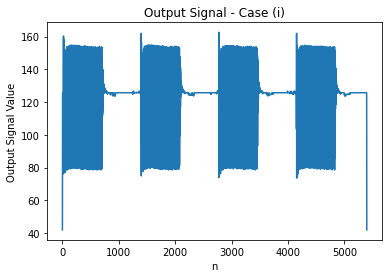

OBSERVATION : We can observe that amplitude of signal decreases when compared to the original signal and also when compared to Case(i) output signal, becase we shift and subtract the signal at two places and add the signal at one place. As a result we can observe huge difference in amplitude, we can also observe noise gets added


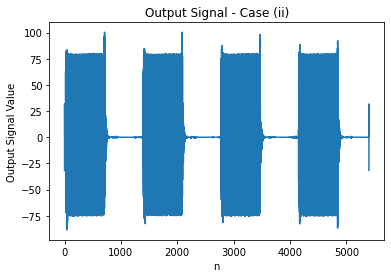

In [11]:
s = input("Enter the sample (alarm/armageddon/cry/wow) : ")             #picking the wave file, from user input
w = wave.open(s+'.wav','rb')                                            #accessing the mentioned wav file
lst= w.readframes(w.getnframes())                                       #variable lst stores all the frames (bytes) in wav file 
fs = w.getframerate()                                                   #variable fs stores framerate of wav signal
signal=[]                                                               #array signal to store the integers (converted from bytes) of the wav signal
time = (float)(w.getnframes())/(w.getframerate())                       #variable time stores duration of the signal

if time > 1.0 :                                                         #signal is converted to 1 sec if duration is greater than 1 sec
    for i in range(fs):                                                 #this is done by storing the wav signal for frames which are in 1 sec
        frame = lst[i]
        signal.append(frame)
else :                                                                 #if duration of signal is less than one sec, we consider the signal as it is
    for i in range(w.getnframes()):
        frame = lst[i]
        signal.append(frame)
        

playsound(s+'.wav')
plt.figure(1)
plt.title("Input Signal")  
plt.xlabel("n")
plt.ylabel("Input Signal Value")  
plt.plot(signal)                                                   #plotting the input signal
plt.show()    


l = 3                                                             #defining the length of convultion function, can be changed by user (here in our case l>=3)

delta = np.zeros(l)
for i in range(0,l):
    if i!=0:     
        delta[i] = 0  
    else:
        delta[i] = 1
        
conv1 = np.zeros(l)                                                 #creating Case (i) impulse response signal
for i in range(0,l):
    if i==0:
        conv1[i] = 0.33*delta[i]
    elif i==1:
        conv1[i] = 0.33*delta[i] + 0.33*delta[i-1]
    else:
        conv1[i] = 0.33*delta[i] + 0.33*delta[i-1] + 0.33*delta[i-2]

conv2 = np.zeros(l)                                                 # #creating Case (ii) impulse response signal
for i in range(0,l):
    if i==0:
        conv2[i] = -0.25*delta[i]
    elif i==1:
        conv2[i] = -0.25*delta[i] + 0.50*delta[i-1]
    else:
        conv2[i] = -0.25*delta[i] + 0.50*delta[i-1] - 0.25*delta[i-2]

output1 = Convolution(signal,conv1)
output2 = Convolution(signal,conv2)

bytesarr = []
for i in range(len(output1)):
    a_int_bytes = int(output1[i]).to_bytes(1, 'big')                    #converting output array of convolution into bytes array
    bytesarr.append(a_int_bytes)
b = b''.join(bytesarr)                                                  #converting bytes array into byte object


print("OBSERVATION : We can observe that amplitude of signal decreases when compared to the original signal, becase we shift and only the signal at three places, i.e 0.33*x[n]+0.33*x[n-1]+0.33*x[n-2]. As a result we can observe very slight difference in amplitude, we can also observe negligle noise gets added")

w = wave.open('output1.wav', 'wb')
w.setnchannels(1)
w.setsampwidth(1)
w.setframerate(fs)
w.writeframes(b)
w.close()

playsound('output1.wav')
plt.figure(2)
plt.title("Output Signal - Case (i)")  
plt.xlabel("n")
plt.ylabel("Output Signal Value")  
plt.plot(output1)                                             #plotting Case(i) output signal
plt.show()


bytesarr = []
for i in range(len(output2)):
    x = output2[i]
    if(x < 0):                                                #since the range for converting to bytes is 0 to 256 we convert negative output to zero
        a_int_bytes = int(0).to_bytes(1, 'big',signed=True)
    else:
        a_int_bytes = int(output2[i]).to_bytes(1, 'big',signed=True)
    bytesarr.append(a_int_bytes)
b = b''.join(bytesarr)  


print("OBSERVATION : We can observe that amplitude of signal decreases when compared to the original signal and also when compared to Case(i) output signal, becase we shift and subtract the signal at two places and add the signal at one place. As a result we can observe huge difference in amplitude, we can also observe noise gets added")

w = wave.open('output2.wav', 'wb')
w.setnchannels(1)
w.setsampwidth(1)
w.setframerate(fs)
w.writeframes(b)
w.close()

playsound('output2.wav')
plt.figure(3)
plt.title("Output Signal - Case (ii)")  
plt.xlabel("n")  
plt.ylabel("Output Signal Value")  
plt.plot(output2)                                         #plotting output Case(ii) signal
plt.show()  